In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore


import pickle
import json

In [2]:
with open('x_y.model.pkl', 'rb') as f:
    x_loaded, y_loaded= pickle.load(f)



print('x', x_loaded)
print('*'*20)
print('y', y_loaded)

x       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.013889           0.0   
1        1.0            0.0      0.0         0.0  0.472222           1.0   
2        1.0            0.0      0.0         0.0  0.027778           1.0   
3        1.0            0.0      0.0         0.0  0.625000           0.0   
4        0.0            0.0      0.0         0.0  0.027778           1.0   
...      ...            ...      ...         ...       ...           ...   
7038     1.0            0.0      1.0         1.0  0.333333           1.0   
7039     0.0            0.0      1.0         1.0  1.000000           1.0   
7040     0.0            0.0      1.0         1.0  0.152778           0.0   
7041     1.0            1.0      1.0         0.0  0.055556           1.0   
7042     1.0            0.0      0.0         0.0  0.916667           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0        

### Model Deployement

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [4]:
x_train, x_test, y_train, y_test=  train_test_split(x_loaded, y_loaded, test_size= 0.2, random_state= 22, stratify=  y_loaded)
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [5]:
y_loaded.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [6]:
knn_model= KNeighborsClassifier(n_neighbors= 5, p=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
# This is imbalnced data training evaluations

y_pred_train=knn_model.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train, y_pred_train)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3725  414]
 [ 537  958]]
****************************************
Accuracy: 0.8312034078807242
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4139
           1       0.70      0.64      0.67      1495

    accuracy                           0.83      5634
   macro avg       0.79      0.77      0.78      5634
weighted avg       0.83      0.83      0.83      5634



In [8]:
# This is imbalnced data testing evaluations

y_pred_test=knn_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[884 151]
 [186 188]]
****************************************
Accuracy: 0.7608232789212207
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.55      0.50      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



### >>>>But Here firslty we wante to choose one of the fine k vlaue (without scalling knn)

#### 1.Manhatten Distance

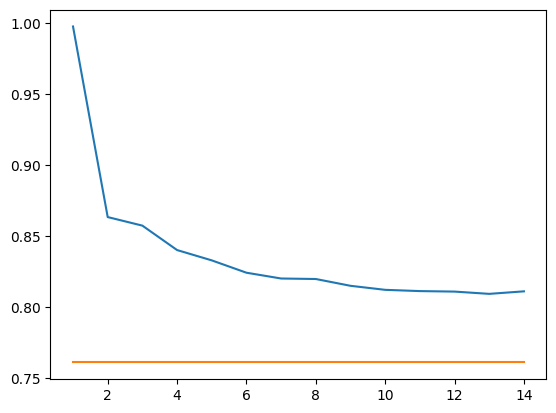

In [11]:
k_values=range(1,15)
training_acc=[]
testing_acc=[]


for k in k_values:
    knn_model_= KNeighborsClassifier(n_neighbors= k, p=1)
    knn_model_.fit(x_train, y_train)
    training_acc.append(knn_model_.score(x_train, y_train))
    testing_acc.append(knn_model.score(x_test, y_test))

plt.plot(k_values, training_acc)
plt.plot(k_values, testing_acc)


In [12]:
knn_model__=KNeighborsClassifier(n_neighbors =2 ,p=1)
knn_model__.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [13]:
# This is imbalnced data training evaluations

y_pred_train=knn_model__.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train, y_pred_train)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[4139    0]
 [ 770  725]]
****************************************
Accuracy: 0.8633297834575789
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      4139
           1       1.00      0.48      0.65      1495

    accuracy                           0.86      5634
   macro avg       0.92      0.74      0.78      5634
weighted avg       0.88      0.86      0.85      5634



In [14]:
# This is imbalnced data testing evaluations

y_pred_test=knn_model__.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[964  71]
 [253 121]]
****************************************
Accuracy: 0.7700496806245565
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86      1035
           1       0.63      0.32      0.43       374

    accuracy                           0.77      1409
   macro avg       0.71      0.63      0.64      1409
weighted avg       0.75      0.77      0.74      1409



#### 2.Eucliden Distance

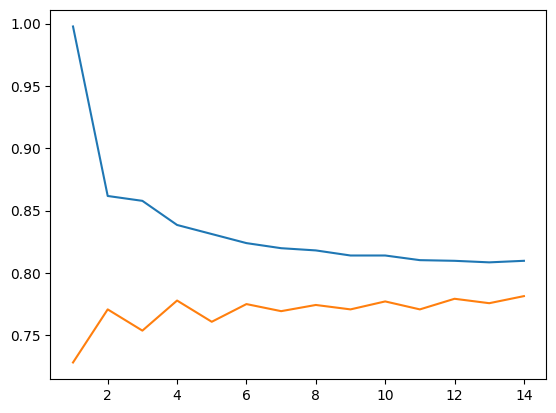

In [15]:
k_values= range(1,15)
training_acc=[]
testing_acc=[]
for k in k_values:
    knn__model=KNeighborsClassifier(n_neighbors= k, p=2)
    knn__model.fit(x_train, y_train)
    training_acc.append(knn__model.score(x_train, y_train))
    testing_acc.append(knn__model.score(x_test, y_test))


plt.plot(k_values, training_acc)
plt.plot(k_values, testing_acc)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


Knn__model__= KNeighborsClassifier(n_neighbors= 4, p=2)
Knn__model__.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
# This is imbalnced data training evaluations

y_pred_train=Knn__model__.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train, y_pred_train)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3961  178]
 [ 732  763]]
****************************************
Accuracy: 0.8384806531771388
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      4139
           1       0.81      0.51      0.63      1495

    accuracy                           0.84      5634
   macro avg       0.83      0.73      0.76      5634
weighted avg       0.84      0.84      0.83      5634



In [22]:
# This is imbalnced data testing evaluations

y_pred_test=Knn__model__.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[947  88]
 [225 149]]
****************************************
Accuracy: 0.7778566359119943
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1035
           1       0.63      0.40      0.49       374

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409



### Sampling Technique

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normal_scaler= MinMaxScaler()
array= normal_scaler.fit_transform(x_loaded)
x= pd.DataFrame(array, columns= x_loaded.columns)
random_oversampler= RandomOverSampler(sampling_strategy= 0.8, random_state=22)
x_sampled, y_sampled = random_oversampler.fit_resample(x_loaded, y_loaded)
print(y_sampled.value_counts())
print('*'*20)

x_train_, x_test_, y_train_,y_test_=  train_test_split(x_sampled, y_sampled, test_size= 0.2,random_state=22 )

print(x_loaded.shape)
print(y_loaded.shape)
print('*'*20)
knn_model_c =KNeighborsClassifier(n_neighbors= 5, p=2)
knn_model_c.fit(x_train_, y_train_)

Churn
0    5174
1    4139
Name: count, dtype: int64
********************
(7043, 26)
(7043,)
********************


KNeighborsClassifier()

In [33]:
# This is balnced data testing evaluations

y_pred_train=knn_model_c.predict(x_train_)
cnf_matrix=confusion_matrix(y_train_, y_pred_train)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_train_, y_pred_train)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_train_, y_pred_train)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[3293  862]
 [ 403 2892]]
****************************************
Accuracy: 0.8302013422818791
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      4155
           1       0.77      0.88      0.82      3295

    accuracy                           0.83      7450
   macro avg       0.83      0.84      0.83      7450
weighted avg       0.84      0.83      0.83      7450



In [30]:
# This is balnced data testing evaluations

y_pred_test=knn_model_c.predict(x_test_)
cnf_matrix=confusion_matrix(y_test_, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test_, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test_, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[761 258]
 [191 653]]
****************************************
Accuracy: 0.758990874932904
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1019
           1       0.72      0.77      0.74       844

    accuracy                           0.76      1863
   macro avg       0.76      0.76      0.76      1863
weighted avg       0.76      0.76      0.76      1863



### SMOTE

In [52]:
# Featrue Scalling Added


from sklearn.preprocessing import StandardScaler, MinMaxScaler

normal_scaler= MinMaxScaler()
array_=normal_scaler.fit_transform(x_loaded)
x=pd.DataFrame(array_, columns= x_loaded.columns)

smote= SMOTE(sampling_strategy= 0.8, k_neighbors= 55) #Backend Run KNeighbor Algorithms if add or not
x_sampled_, y_sampled_= smote.fit_resample(x_loaded, y_loaded)

print(y_sampled.value_counts())

print('*'*20)

x_train__,x_test__, y_train__,y_test__=   train_test_split(x_sampled_, y_sampled, test_size=0.2, random_state=22)

print(x_loaded.shape)
print(y_loaded.shape)
print('*'*20)
knn___model_=KNeighborsClassifier(n_neighbors= 5, p=2)
knn___model_.fit(x_train__, y_train__)


print('*'*20)


# This is balnced data training evaluations

y_pred_train=knn___model_.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)
print('*'*60)
# This is balnced data testing evaluations

y_pred_test=knn___model_.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

Churn
0    5174
1    4139
Name: count, dtype: int64
********************
(7043, 26)
(7043,)
********************
********************
confusion Matrix of Training Evaluations:
 [[3310  845]
 [ 341 2954]]
****************************************
Accuracy: 0.8408053691275168
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      4155
           1       0.78      0.90      0.83      3295

    accuracy                           0.84      7450
   macro avg       0.84      0.85      0.84      7450
weighted avg       0.85      0.84      0.84      7450

************************************************************
Confusion Matrix of Testing Evaltuations: 
 [[777 242]
 [154 690]]
****************************************
Accuracy: 0.7874396135265701
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.83      0.76   

#### Again 1. Manhatten Distance Count on with scalling for finding k values which will be fine as for accuracy


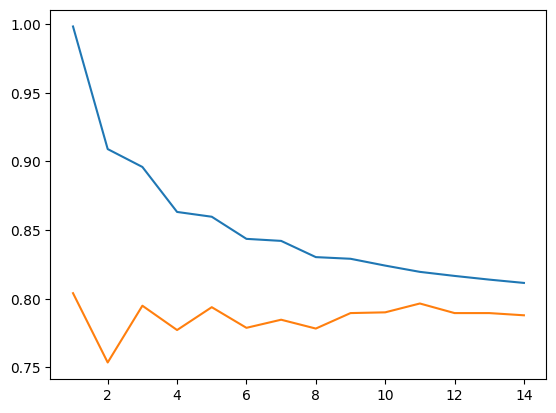

In [53]:

k_values=range(1,15)
training_acc=[]
testing_acc=[]
for k in k_values:
    knnmodel=KNeighborsClassifier(n_neighbors=k, p=1)
    knnmodel.fit(x_train__, y_train__)
    training_acc.append(knnmodel.score(x_train__, y_train__))     #MinMax chose hre
    testing_acc.append(knnmodel.score(x_test__, y_test__))   #  or x__test__ use

plt.plot(k_values, training_acc)
plt.plot(k_values, testing_acc)



In [54]:
knnmodel=KNeighborsClassifier(n_neighbors= 3, p=1)
knnmodel.fit(x_train__, y_train__)


print('*'*40)

# This is training evaluations

y_pred_train=knnmodel.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=knnmodel.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

****************************************
confusion Matrix of Training Evaluations:
 [[3693  462]
 [ 313 2982]]
****************************************
Accuracy: 0.8959731543624161
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4155
           1       0.87      0.91      0.88      3295

    accuracy                           0.90      7450
   macro avg       0.89      0.90      0.90      7450
weighted avg       0.90      0.90      0.90      7450

Confusion Matrix of Testing Evaltuations: 
 [[839 180]
 [202 642]]
****************************************
Accuracy: 0.7949543746645196
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1019
           1       0.78      0.76      0.77       844

    accuracy                           0.79      1863
   macro avg       0.79    

#### 2.Eucliden Distance

In [55]:
k_values=range(1, 15)
training_acc=[]
testing_acc=[]
for k in k_values:
    knn_e=KNeighborsClassifier(n_neighbors=k , p=2)
    knn_e.fit(x_train__, y_train__)
    training_acc.append(knn_e.score(x_train__, y_train__))
    testing_acc.append(knn_e.score(x_test__, y_test__))

plt.plot(k_values, training_acc)
plt.plot(k_values, testing_acc)

In [57]:
knn_e=KNeighborsClassifier(n_neighbors= 5 , p=2)
knn_e.fit(x_train__, y_train__)


# This is training evaluations

y_pred_train=knn_e.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=knn_e.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3310  845]
 [ 341 2954]]
****************************************
Accuracy: 0.8408053691275168
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      4155
           1       0.78      0.90      0.83      3295

    accuracy                           0.84      7450
   macro avg       0.84      0.85      0.84      7450
weighted avg       0.85      0.84      0.84      7450

Confusion Matrix of Testing Evaltuations: 
 [[777 242]
 [154 690]]
****************************************
Accuracy: 0.7874396135265701
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      1019
           1       0.74      0.82      0.78       844

    accuracy                           0.79      1863
   macro avg       0.79      0.79      0.79      1863
weighted avg  

In [ ]:
### 4. Feature Enginerring :
 1] Feature Transformation  & Imputation values : is  applied above(done)
 2] Scalling : Scalling is applied with as imbalanced data's  (done)
 3] Imputation of Missing Values : not any  kind of missing values  (done)
 4] Handling of outliers : alredy done (Done)
 5] Encoding : Already Done (Done)